# Gorle Manasa

## TheSparkFoundation GRIPMAY2021

## Task1 - Predict the percentage of an students based on the no. of Hours

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('student_scores.csv')

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### DATA VISUALIZATION

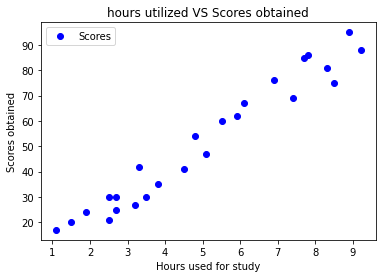

In [7]:
df.plot(x = 'Hours',y = 'Scores', c= 'b',alpha=1,style= 'o')
plt.title('hours utilized VS Scores obtained')
plt.xlabel('Hours used for study')
plt.ylabel('Scores obtained')
plt.show()

In [8]:
print('the above plot seems like a regression fit')

the above plot seems like a regression fit


In [9]:
X = df.iloc[:,:-1].values
y = df.iloc[:,1].values
print("Hours Studied = ",X[0:5])
print("Scores Obtained = ",y[0:5])

Hours Studied =  [[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]]
Scores Obtained =  [21 47 27 75 30]


In [10]:
X.shape

(25, 1)

In [11]:
df.shape

(25, 2)

checking for null values

In [12]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20, random_state=42) 

In [15]:
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

In [16]:
from sklearn.linear_model import LinearRegression
print('importing regression model')

lr = LinearRegression()
lr.fit(X_train,y_train)
print('Fitting the model using LinearRegression.fit()')

importing regression model
Fitting the model using LinearRegression.fit()


In [17]:
X.shape

(25, 1)

In [18]:
y.shape

(25,)

In [19]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [20]:
predictions = lr.predict(X_test)

In [21]:
print(X_test)

[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]]


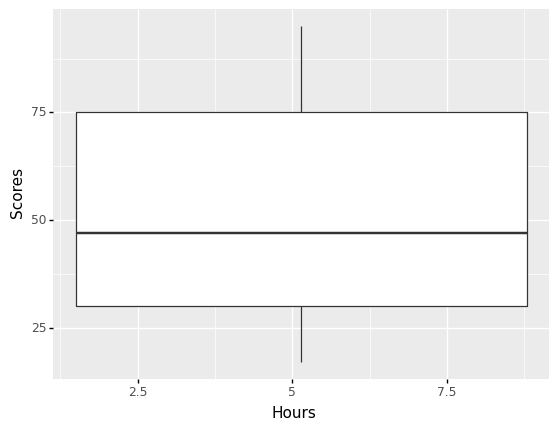

<ggplot: (133493660058)>

In [22]:
import plotnine as p
dff = p.ggplot(data=df, mapping=p.aes(x=df['Hours'], y='Scores')) 
dff + p.geom_boxplot()

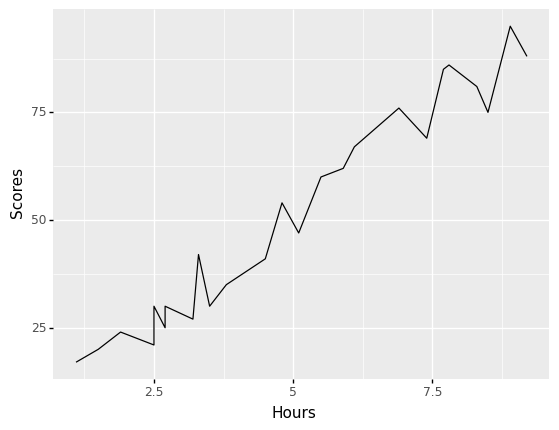

<ggplot: (133493660016)>

In [23]:
dff = p.ggplot(data=df, mapping=p.aes(x=df['Hours'], y='Scores')) 
dff + p.geom_line()

## Here we can say the difference between the plots after regression and before regression 

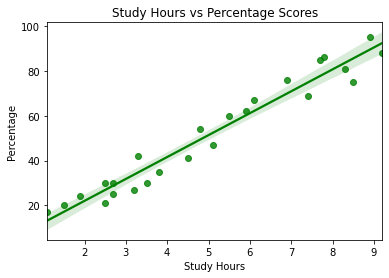

In [24]:
sns.regplot(x=df['Hours'],y=df['Scores'],data=df, color='g')
plt.title('Study Hours vs Percentage Scores')
plt.xlabel('Study Hours')
plt.ylabel('Percentage')
plt.show()

In [25]:
df1=pd.DataFrame({'Actual_values':y_test,'Predicted_vales':predictions})
df1


,Actual_values,Predicted_vales
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


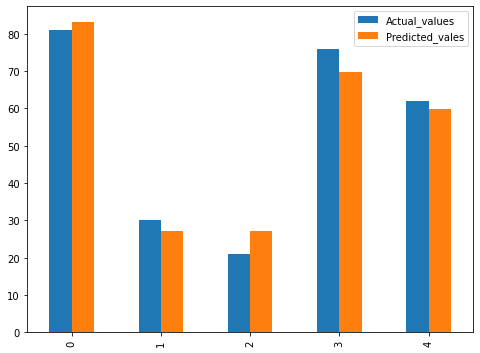

In [26]:
df1.plot(kind='bar',figsize=(8,6))
plt.show()

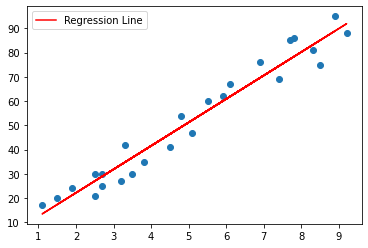

In [27]:
slope = lr.coef_
intercept = lr.intercept_
line_fit = slope*X + intercept
line_fit
plt.scatter(X,y)
plt.plot(X,line_fit,color='red', label='Regression Line')
plt.legend()
plt.show()

In [28]:
print("Training Score:",lr.score(X_train,y_train))
print("Test Score:",lr.score(X_test,y_test))

Training Score: 0.9491209376364416
Test Score: 0.9678055545167994


In [29]:
from sklearn import metrics
print('mean_absolute_error:',metrics.mean_absolute_error(y_test, predictions))
print('mean_square_error:',metrics.mean_squared_error(y_test, predictions))
print('mean_absolute_error:',np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('r2_score:',metrics.r2_score(y_test, predictions))

mean_absolute_error: 3.9207511902099244
mean_square_error: 18.943211722315272
mean_absolute_error: 4.352380006653288
r2_score: 0.9678055545167994


Testing using our own data 


In [30]:
hours = float(input("Enter the Study Hours : "))
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = lr.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

Enter the Study Hours : 9.25
No of Hours = 9.25
Predicted Score = 92.38611528261494


### Thank you